In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


In [23]:
df = pd.read_csv('googleplaystore.csv')

In [24]:
#Before
print(df['Size'])

#Data Cleaning for "SIZE" column
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

#After
print(df['Size'])

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object
0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10836     53
10837    3.6
10838    9.5
10839    NaN
10840     19
Name: Size, Length: 10841, dtype: object


In [25]:
#Before
print(df['Installs'])

# Data cleaning for "Installs" column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))

#After 
print(df['Installs'])

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object
0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object


In [26]:
#Before
print(df['Price'])

df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())

#After
print(df['Price'])


0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object


In [27]:
# Row 10472 removed due to missing value of Category
df.drop(df.index[10472], inplace=True)
# Row [7312,8266] removed due to "Unrated" value in Content Rating
df.drop(df.index[[7312,8266]], inplace=True)

In [28]:
#The raw data can have random sorting. To solve this, we will use:
# Sort by "Category"
df.sort_values("Category", inplace = True)

In [29]:
print(df['Category'])

0       ART_AND_DESIGN
35      ART_AND_DESIGN
36      ART_AND_DESIGN
37      ART_AND_DESIGN
38      ART_AND_DESIGN
             ...      
3634           WEATHER
3633           WEATHER
3632           WEATHER
8168           WEATHER
3635           WEATHER
Name: Category, Length: 10838, dtype: object


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split


In [33]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])

In [34]:
print(df["Content Rating NUM"])

0       1
35      1
36      1
37      1
38      1
       ..
3634    1
3633    1
3632    1
8168    1
3635    1
Name: Content Rating NUM, Length: 10838, dtype: int32


In [35]:
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
df["Category NUM"] = lb_make.fit_transform(df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1

In [38]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
# Rounding the mean value to 1 decimal place
df['Rating'].round(1)
df.dropna(axis=0, inplace=True)


In [39]:
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [40]:
# Pie chart for Category
value_category = np.zeros(33)
labels_category = df['Category'].unique()
for i in range(len(df['Category'])):
 try:
  value = df['Category'][i]
  num = dict_category[value]
  value_category[num] = value_category[num] + 1
 except:
  pass

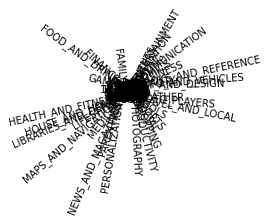

In [41]:
# Free and paid counts for each category
free_paid_list = [] 
# 1st value = Free 
# 2nd value = Paid 
### Alternate values
for j in labels_category:
 free_count = 0
 paid_count = 0
 for i in range(len(df['Type'])):
  try:
   if df['Category'][i] == j:
    if df['Type'][i] == "Free":
     free_count += 1
    if df['Type'][i] == "Paid":
     paid_count += 1
  except:
   pass   
 free_paid_list.append(free_count)
 free_paid_list.append(paid_count)
colors_free_paid = []
free_color = "#00ff00" # GREEN color
paid_color = "#0000ff" # BLUE color
for i in range(int(len(free_paid_list)/2)):
 colors_free_paid.append(free_color)
 colors_free_paid.append(paid_color)
plt.axis("equal")
plt.pie(value_category, labels=labels_category, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.pie(free_paid_list, colors=colors_free_paid, radius=1.25, autopct='%0.2f%%', pctdistance=1.0)
centre_circle = plt.Circle((0,0),1.0,color='black', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [42]:
# Get possible values for GAME and FAMILY in Genres
list_games_genres = []
list_family_genres = []
for i in range(len(df['Category'])):
 try:
  if df['Category'][i] == 'GAME':
   value = df['Genres'][i]
   if value not in list_games_genres:
    list_games_genres.append(value)
  if df['Category'][i] == 'FAMILY':
   value = df['Genres'][i]
   if value not in list_family_genres:
    list_family_genres.append(value)  
 except:
  pass
value_games = np.zeros(len(list_games_genres))
labels_games = sorted(list_games_genres)
value_family = np.zeros(len(list_family_genres))
labels_family = sorted(list_family_genres)

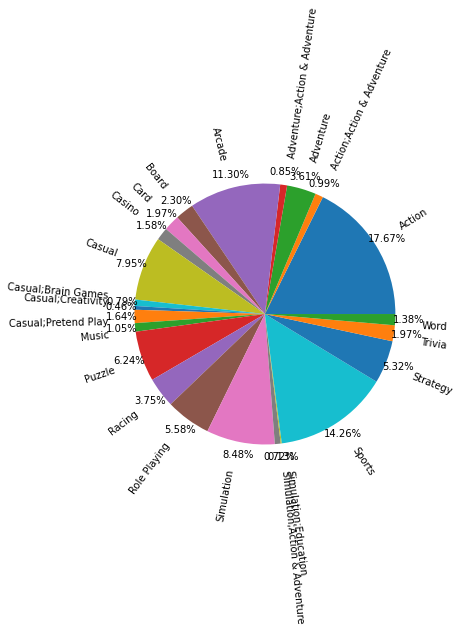

In [43]:
# Dictionary for games:
dict_games = {}
for i in range(len(labels_games)):
 dict_games[labels_games[i]] = i
# Dictionary for family
dict_family = {}
for i in range(len(labels_family)):
 dict_family[labels_family[i]] = i
# Pie chart for GAME in Genres
for i in range(len(df['Genres'])):
 try:
  if df['Genres'][i] in labels_games:
   value = df['Genres'][i]
   num = dict_games[value]
   value_games[num] = value_games[num] + 1
 except:
  pass
plt.axis("equal")
plt.pie(value_games, labels=labels_games, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()

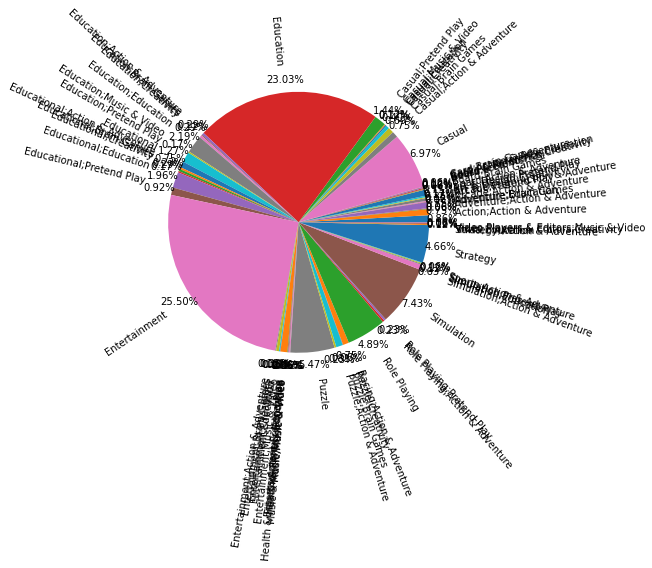

In [44]:
# Pie chart for FAMILY in Genres
for i in range(len(df['Category'])):
 try:
  if df['Genres'][i] in labels_family:
   value = df['Genres'][i]
   num = dict_family[value]
   value_family[num] = value_family[num] + 1
 except:
  pass
plt.axis("equal")
plt.pie(value_family, labels=labels_family, radius=1.5, autopct='%0.2f%%', rotatelabels=True, pctdistance=1.1, labeldistance=1.2)
plt.show()

In [45]:
# Features selection
features = ['Category NUM', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating NUM']
X = df[features]
# Label selection
y = df.Rating
# For testing purpose
#train_X, test_X, train_y, test_y = train_test_split(X, y)

In [46]:
# Loop is used to get more generalized result
total_sum = []
for i in range(10):
 # Hypertuning of parameters for better prediction
 forest_model = RandomForestRegressor(n_estimators=100, max_features=3, min_samples_leaf=10)
 forest_model.fit(X, y)
 # For testing purpose
 #forest_model.fit(train_X, train_y)
 # Pass values to get prediction for ratings
 # 1st value = Category NUM
 # 2nd value = Reviews
 # 3rd value = Size
 # 4th value = Installs
 # 5th value = Price
 # 6th value = Content Rating NUM
 forest_pred = forest_model.predict([[4,100000,20,1000000,5,1]])
 total_sum.append(forest_pred)
 # For testing purpose
 #forest_pred = forest_model.predict(test_X)
 #print(mean_absolute_error(forest_pred, test_y))

In [47]:
print(round(np.median(total_sum), 2))

4.45
